# 加载配置文件
config/show_config.json

In [1]:
show_con_path = 'D:\work_place\BigDataLabs\lab1\python_labs\Lab3\CNN\config\show_config.json'

import json
with open(show_con_path,'r',encoding='utf-8') as file:
    paths = json.load(file)

print(paths)

{'model_path': 'D:\\work_place\\BigDataLabs\\lab1\\python_labs\\Lab3\\CNN\\model\\model_45_54_40_49.keras', 'data_path': 'D:\\work_place\\BigDataLabs\\lab1\\python_labs\\Lab3\\CNN\\data\\Dataset_45_54_40_49.h5', 'pic_path': 'D:\\work_place\\BigDataLabs\\lab1\\python_labs\\Lab3\\CNN\\pic'}


# 加载模型和数据集
1. 训练好的模型
2. 保存下来的对应的测试集

In [2]:
import numpy as np
import tensorflow
#import tensorflow.keras.models as models
models = tensorflow.keras.models

from h5Reader.readHdf5 import readH5

model_path = paths['model_path']

model = models.load_model(model_path)

model.summary()

data_path = paths['data_path']
X_train,Y_train,X_test,Y_test = readH5(data_path,['X_train','Y_train','X_test','Y_test'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 4, 10, 10, 32)     4352      
                                                                 
 max_pooling3d (MaxPooling3  (None, 2, 5, 5, 32)       0         
 D)                                                              
                                                                 
 conv3d_1 (Conv3D)           (None, 2, 5, 5, 64)       55360     
                                                                 
 max_pooling3d_1 (MaxPoolin  (None, 1, 2, 2, 64)       0         
 g3D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

# 模型预测

In [3]:
predictions = model.predict(X_test)

84/84 [==============================] - 1s 12ms/step


# 性能评估
1. 计算MSE和RMSE
2. 计算MAE

In [4]:
print(predictions.shape)
assert predictions.shape == Y_test.shape, "确保 predictions 和 Y_test 的形状相同"

# 计算MSE
mse = np.mean((predictions - Y_test) ** 2)

# 计算RMSE
rmse = np.sqrt(mse)

# 计算MAE
mae = np.mean(np.abs(predictions - Y_test))

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

(2674, 10, 10, 5)
MSE: 1550.905807120793
RMSE: 39.381541451812076
MAE: 17.956460780595037


# 反解析文件后缀名称

In [ ]:
import os
import re

pic_path = paths['pic_path']

def index_from_file_name(file_name):
    # 提取最后一个反斜杠后面的字符串
    file_name = file_name.split('\\')[-1]
    # 去除文件扩展名.h5
    file_name = file_name.split('.')[0]
    # 提取数字
    numbers = list(map(int, re.findall(r'\d+', file_name)))
    return numbers

[sx,ex,sy,ey] = index_from_file_name(data_path)

# 可视化
1. 所有小区的时间序列的预测值和真实值

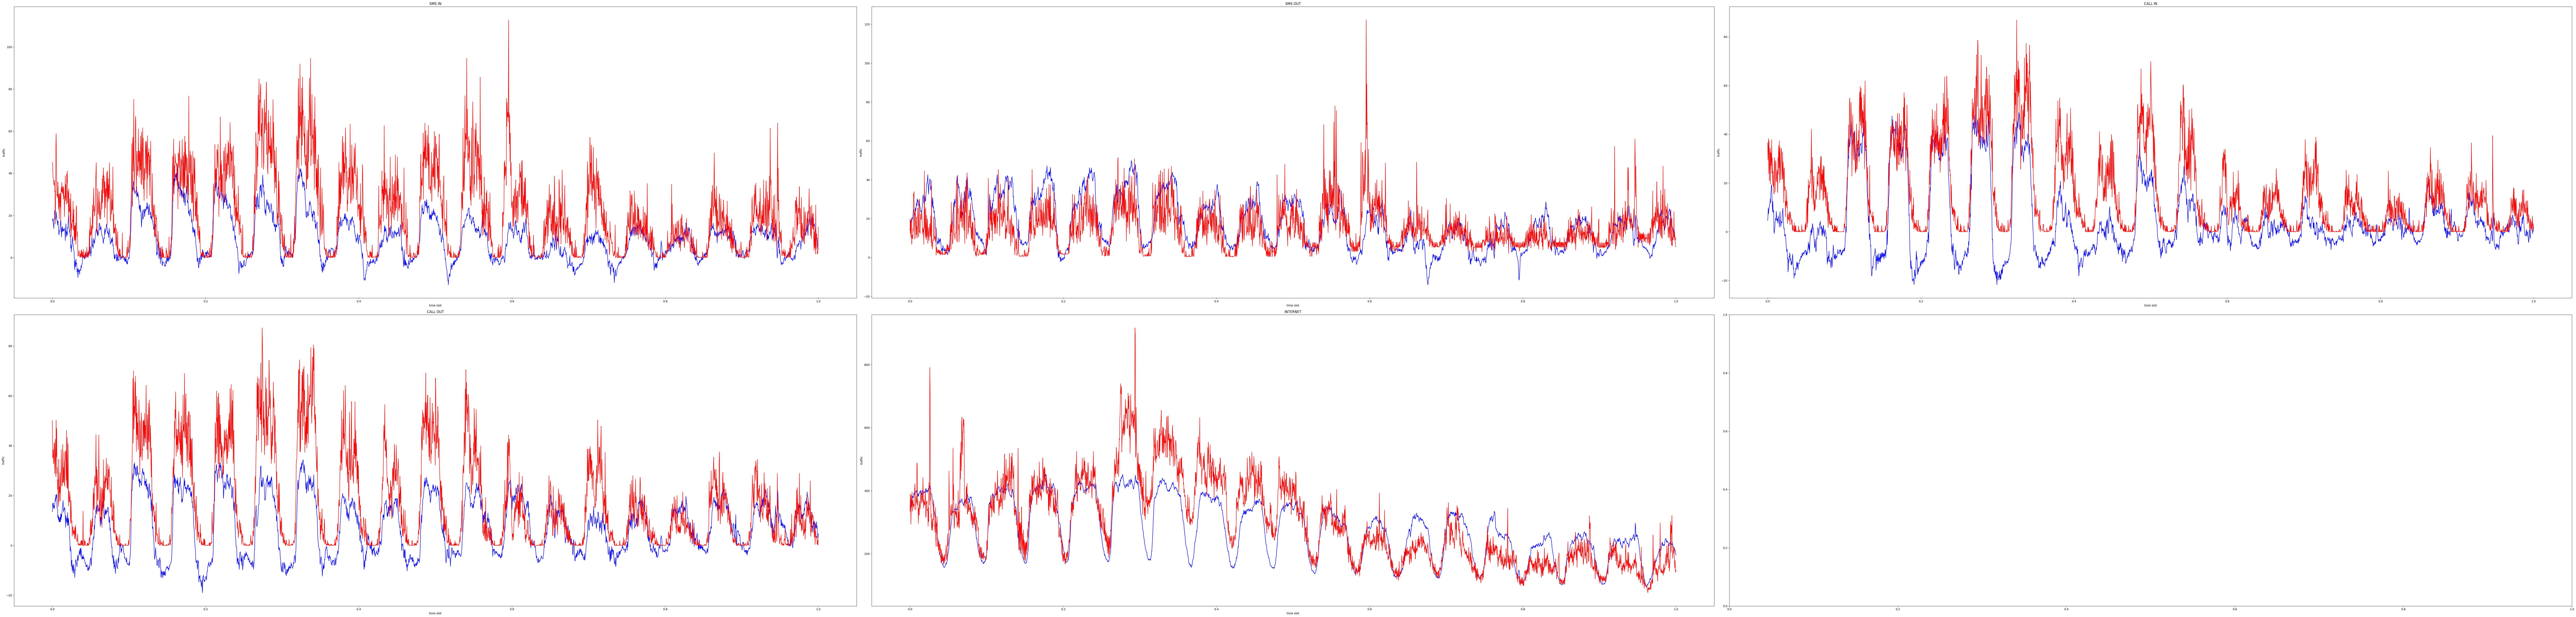

In [6]:
import matplotlib.pyplot as plt

def specific_region_time_cmp(x:int,y:int):
    fig, axs = plt.subplots(2, 3, figsize=(125,30))
    business_name = ["SMS IN","SMS OUT","CALL IN","CALL OUT","INTERNET"]
    
    def draw(i:int,j:int,business:int):
        x_seq = np.linspace(0,1,predictions.shape[0])
        predict = np.zeros((predictions.shape[0]))
        ground_truth = np.zeros((predictions.shape[0]))
        
        for k in range(predictions.shape[0]):
            predict[k] = predictions[k,x,y,business]
            ground_truth[k] = Y_test[k,x,y,business]
        
        axs[i,j].plot(x_seq,predict,color='blue',label='predict')
        axs[i,j].plot(x_seq,ground_truth,color='red',label='ground_truth')
        axs[i,j].set_title(business_name[business])
        axs[i,j].set_ylabel("traffic")
        axs[i,j].set_xlabel("time slot")
    
    draw(0,0,0)
    draw(0,1,1)
    draw(0,2,2)
    draw(1,0,3)
    draw(1,1,4)
            
    plt.tight_layout()
    pic_name = f'specific_region_{str(x+sx)}_{str(y+sy)}.png'
    plt.savefig(os.path.join(pic_path,pic_name),dpi=300,bbox_inches='tight')
    plt.show()


specific_region_time_cmp(0,0)

2. 某个时刻的所有小区的预测值和真实值

In [ ]:
def specific_time_region_cmp(ts:int):
    